In [1]:
import time
import numpy as np
import pandas as pd

from SA.simulatedAnnealing import simulatedAnnealing
from problems.TSP.SimulatedAnnelingOperationsTSP import SimulatedAnnelingOperationsTSP as TSP

from utils.calculations import Point
from utils.manipulationFile import read_txt_file
import utils.cooling as alpha
from utils.graphics import create_plot, create_box_plots

from scripts.tsp import experiment, experiment_one_SA



In [2]:
PATH: str = "samples/eil51.txt"
problem: str = "TSP51"

## Teste para o Grafo com 51 cidades

+ N = 500_000
+ Número de Cidades Criada por criação de vizinho: 1, 3, 5
+ Equações Testadas: 5, 8, 9
+ TN = 0.01
+ SA_Max: 1, 5, 10

In [ ]:
df = experiment(
    problem=problem,
    path=PATH,
    num_interation=10,
    num_neighbors_mod_list=[1, 3, 5],
    num_neighbors=500,
    SA_max_list=[1, 5, 10],
    eq_list=[5, 8, 9],
    TN=0.01,
    N=500_000
)


Loading:   0%|          | 0/27 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
df 

,Problema,SA_max,Equação,Número de Vizinhos,Número de Interações,Temperatura Inicial,Melhor Solução,Média,Desvio Padrão,Tempo (s),Imagem
0,TSP51,1,1,1,100,56.0,1032.0,1161.0,78.008974,0.573766,con-PTSP51-SA1-EQ1-N100-1745522573916604348.png
1,TSP51,5,1,1,100,101.0,1068.0,1166.3,46.240783,0.486853,con-PTSP51-SA5-EQ1-N100-1745522574453481206.png
2,TSP51,10,1,1,100,74.0,1075.0,1164.5,51.856051,0.550834,con-PTSP51-SA10-EQ1-N100-1745522574987943094.png
3,TSP51,1,8,1,100,79.0,1050.0,1194.9,66.710494,0.395418,con-PTSP51-SA1-EQ8-N100-1745522575663512684.png
4,TSP51,5,8,1,100,94.0,1047.0,1180.4,62.114733,0.407656,con-PTSP51-SA5-EQ8-N100-1745522576027765304.png
5,TSP51,10,8,1,100,81.0,1064.0,1191.3,62.093558,0.361638,con-PTSP51-SA10-EQ8-N100-1745522576428350349.png
6,TSP51,1,9,1,100,108.0,1102.0,1213.4,66.127453,0.445936,con-PTSP51-SA1-EQ9-N100-1745522576879251294.png
7,TSP51,5,9,1,100,126.0,1122.0,1221.3,63.250375,0.374079,con-PTSP51-SA5-EQ9-N100-1745522577328999978.png
8,TSP51,10,9,1,100,89.0,1147.0,1242.3,72.514895,0.435431,con-PTSP51-SA10-EQ9-N100-1745522577692025579.png
9,TSP51,1,1,3,100,87.0,1097.0,1183.8,36.668242,0.463371,con-PTSP51-SA1-EQ1-N100-1745522578243074838.png


In [ ]:
# ponto ótimo 426 e 21282

In [ ]:
id = df["Melhor Solução"].idxmin()

id

5

In [ ]:
df_media = df[["SA_max", "Equação", "Número de Vizinhos", "Média", "Desvio Padrão" ]].sort_values(["SA_max"])
df_media

,SA_max,Equação,Número de Vizinhos,Média,Desvio Padrão
0,1,1,1,1161.0,78.008974
3,1,8,1,1194.9,66.710494
6,1,9,1,1213.4,66.127453
9,1,1,3,1183.8,36.668242
12,1,8,3,1218.8,65.901138
15,1,9,3,1233.6,50.549382
21,1,8,5,1196.8,74.233146
18,1,1,5,1161.6,57.201748
24,1,9,5,1241.3,69.994357
13,5,8,3,1231.7,62.605191


8104.941709961044


Loading: 100%|██████████| 100000/100000 [05:02<00:00, 330.30it/s]


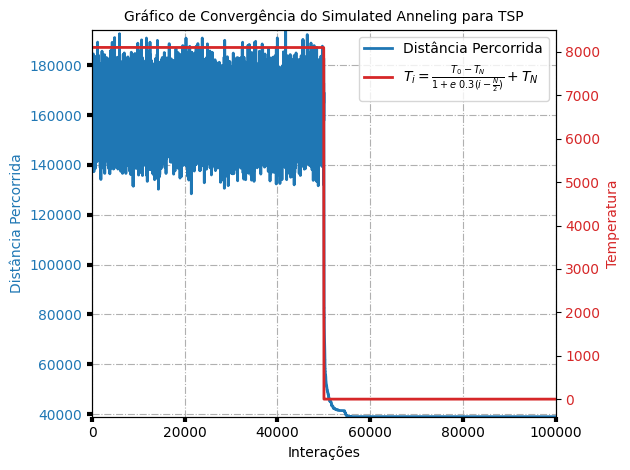

num_elements: 100
distance: 38958.56777612955
elements: [25, 65, 64, 3, 96, 74, 89, 71, 20, 35, 37, 98, 58, 44, 59, 40, 70, 99, 47, 38, 49, 43, 72, 56, 19, 85, 34, 26, 54, 82, 33, 51, 77, 22, 10, 73, 16, 14, 31, 90, 97, 46, 0, 92, 27, 57, 68, 63, 39, 53, 1, 67, 84, 12, 32, 75, 94, 81, 18, 52, 69, 21, 93, 15, 87, 78, 17, 23, 83, 9, 48, 5, 62, 91, 7, 76, 61, 11, 45, 42, 2, 13, 28, 88, 30, 79, 55, 41, 66, 60, 80, 24, 50, 86, 8, 6, 29, 95, 4, 36]



38958.56777612955

In [9]:
res = experiment_one_SA(
    problem="TSP100",
    path="samples/eil100.txt",
    num_interation=1,
    num_neighbors_mod=1,
    num_neighbors=500,
    SA_max=10,
    eq=4,
    TN=0.01,
    N= 100_000,
    t=0,
    show=True,
    bar=True
)

res[6]

In [ ]:
# 5 - 500 mil - 26006.54857537991
# 3 - 100 mil - 32607.466634988803
# 4 - 100 mil - 38958.56777612955